In [1]:
%matplotlib inline
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import random
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import tensorlayer as tl
sess = tf.InteractiveSession()

In [5]:
img_list = !ls data/train/
for i in range(len(img_list)):
    img_list[i] = 'data/train/' + img_list[i]

In [4]:
class data_aug():
    def __init__(self, sess, img_list, crops_per_img=10, 
                 aug_types=['flip_left_right', 'flip_up_down']):
        self.session = sess
        self.img_list = img_list
        self.crops_per_img = crops_per_img
        self.aug_types = aug_types
        self.crop_list = []
        
    def open_file_crop(self):
        for idx, img in enumerate(self.img_list):
            raw_img = Image.open(img)
            img_array = np.array(raw_img)
            img_tensor = tf.random_crop(img_array, (128, 128, 3))
            for crop_idx in range(self.crops_per_img):
                crop_img = img_tensor.eval()
                crop_img = Image.fromarray(crop_img)
                save_path = 'aug_data/train/{0}_{1}.png'.format(idx, crop_idx)
                crop_img.save(save_path)
                self.crop_list.append(save_path)
            print('finish crop {0}/{1}'.format(idx, len(self.img_list)))

    def open_file_aug(self, crop_list):
        # flip left and right and random rotate
        assert len(crop_list) > 0
        for idx, crop in enumerate(crop_list):
            raw_img = tf.gfile.Open(crop, 'rb').read()
            img_data = tf.image.decode_image(raw_img, channels=3)
            img_data = tf.image.convert_image_dtype(img_data, tf.float32)
            aug_imgs = [img_data.eval()]
            aug_imgs.append(tf.image.flip_left_right(img_data).eval())
            aug_imgs.append(self._random_rotate(aug_imgs[0]))
            aug_imgs.append(self._random_rotate(aug_imgs[0]))
            aug_imgs.append(self._random_rotate(aug_imgs[1]))
            aug_imgs.append(self._random_rotate(aug_imgs[1]))
            for i, aug_img in enumerate(aug_imgs):
                if i == 0: continue
                save_path = crop.split('.')[0] + '_aug_{}.png'.format(i)
                Image.fromarray(self._float2uint(aug_img)).save(save_path)
            print('finish {0}/{1}'.format(idx, len(crop_list)))
    
    def _random_rotate(self, img, low_angle=1, high_angle=4):
        assert type(img) == np.ndarray
        img_r = Image.fromarray(self._float2uint(img))
        return self._uint2float(np.array(img_r.rotate(random.randint(low_angle, high_angle))))
    
    def _float2uint(self, images):
        """ transform images from [0, 1.0] to uint8 """
        assert \
            np.min(images) >= 0.0 - 1e-5 and np.max(images) <= 1.0 + 1e-5 \
            and (images.dtype == np.float32 or images.dtype == np.float64), \
            'The input images should be float64(32) and in the range of [0.0, 1.0]!'
        return (images * 255).astype(np.uint8)
    
    def _uint2float(self, images):
        """ transform images from uint8 to [0.0, 1.0] of float64 """
        assert images.dtype == np.uint8, 'The input image type should be uint8!'
        return images / 255.0

In [5]:
(1048 + 585) * 10 * 6 * 0.8

78384.0

In [6]:
da = data_aug(sess, img_list)

In [7]:
print('')
#da.open_file_crop()

In [8]:
da.crop_list = !ls aug_data/train/
temp_list = []
for i in range(len(da.crop_list)):
    if '_aug' not in da.crop_list[i]:
        temp_list.append('aug_data/train/' + da.crop_list[i])
da.crop_list = temp_list

In [13]:
def show_crops(crop_list, idx):
    idx = int(idx / 10) * 10
    s_idx = idx - 10
    crop_list = crop_list[s_idx:idx]
    for i in range(1, 11):
        plt.subplot(2,5,i)
        plt.imshow(np.array(Image.open(crop_list[i - 1])))
        plt.axis('off')
    plt.show()

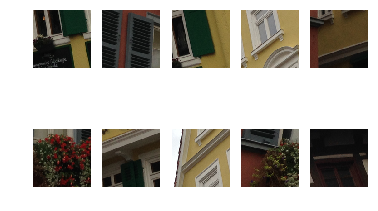

In [14]:
show_crops(da.crop_list, 25)

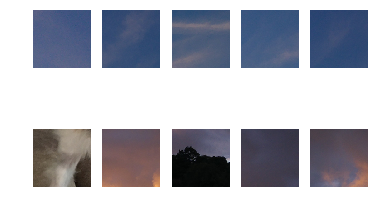

In [15]:
show_crops(da.crop_list, 765)

In [7]:
img = np.array(Image.open(img_list[i]))

In [8]:
img_f = tl.prepro.flip_axis(img, axis=1)

In [12]:
img_c = tl.prepro.crop(img_f, 128, 128, is_random=True)

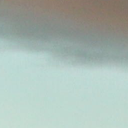

In [14]:
Image.fromarray(img_c)